In [27]:
import tifffile
from tifffile import TiffFile
from tifffile.tifffile import imagej_description_metadata
import math
import numpy as np
import ComputeGaussianPSF as CG

import matplotlib.pyplot as plt

In [28]:
filepath = '/run/media/imaging/Elmo_Pro/SIM_Data/Sara 2017 MFM SIM/'
filename = 'boe-8-9-4135-d004'
infile= filepath + filename + '.tif'
# my_im = tifffile.imread(infile)
with TiffFile(infile) as tif:
    assert tif.is_imagej
    # print detailed information about the file
    # print(tif.__str__(detail=2))
    # get image resolution from TIFF tags
    tags = tif.pages[0].tags
    x_resolution = tags['XResolution'].value
    y_resolution = tags['YResolution'].value
    #z_resolution = tags['ZResolution'].value
    resolution_unit = tags['ResolutionUnit'].value

    my_im = tif.series[0].asarray()
    print(my_im.shape)
    dims = my_im.shape
    print(dims[0])
    print(dims[1])
    print(dims[2])
    a = (np.zeros_like(my_im)).astype(np.uint16)
    print(a.shape)
    offset = 0
    # for i in range(15):
    #     for j in range(4):
    #         a[i + j*15,:,:] = my_im[i + j*15,:,:]



    #a = np.reshape(my_im,(3,dims[0]//15,5,dims[1],dims[2]))
    a = np.swapaxes(my_im,0,1)
    #a = np.reshape(a, (dims[0], dims[1], dims[2]))
    # plt.imshow(a[2,0,1]) 
    outfile = filepath + filename + "_test_pa.tif"
    # with tifffile.TiffWriter('temp.tif') as tif:
    #   for i in range(4):
    #     filename = f"image_{i}"
    #     img = np.random.randint(0, 1023, (256, 256), 'uint16')
    #     tif.save(img, photometric='minisblack', description=filename)
    tifffile.imwrite(outfile,a, resolution=(x_resolution, y_resolution, resolution_unit),imagej=True)


(5, 3, 756, 756)
5
3
756
(5, 3, 756, 756)


TypeError: Invalid shape (3, 756, 756) for image data

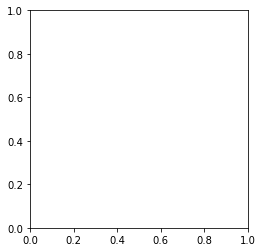

In [29]:
im_fft = np.fft.fft2(my_im[0,:,:])
im_fft_shft = np.fft.fftshift(im_fft)
# im_fft = np.fft.fftshift(my_im)
plt.imshow(np.abs(im_fft_shft))
plt.figure(2)
plt.imshow(np.abs(im_fft))